# Data Exploration and Preprocessing

In this notebook, we will load the dataset, explore it, and perform necessary preprocessing tasks.

In [33]:
# Import necessary libraries
import pandas as pd
from sqlalchemy import create_engine, text
import matplotlib.pyplot as plt
import seaborn as sns

# Scikit learn libraries
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

from src.utils import fetch_data_from_db

## Load the Data

We will load the data from postgres database into a pandas DataFrame.

In [34]:
query = "SELECT * FROM xdr_data"
df = fetch_data_from_db(query)

## Data Overview

In [35]:
# Print the first few rows of the DataFrame
df.head()

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,1.311448e+19,4/4/2019 12:01,770.0,4/25/2019 14:35,662.0,1823652.0,2.082014e+14,3.366496e+10,3.552121e+13,9.16456699548519E+015,...,15854611.0,2501332.0,8198936.0,9656251.0,278082303.0,14344150.0,171744450.0,8814393.0,36749741.0,308879636.0
1,1.311448e+19,4/9/2019 13:04,235.0,4/25/2019 8:15,606.0,1365104.0,2.082019e+14,3.368185e+10,3.579401e+13,L77566A,...,20247395.0,19111729.0,18338413.0,17227132.0,608750074.0,1170709.0,526904238.0,15055145.0,53800391.0,653384965.0
2,1.311448e+19,4/9/2019 17:42,1.0,4/25/2019 11:58,652.0,1361762.0,2.082003e+14,3.376063e+10,3.528151e+13,D42335A,...,19725661.0,14699576.0,17587794.0,6163408.0,229584621.0,395630.0,410692588.0,4215763.0,27883638.0,279807335.0
3,1.311448e+19,4/10/2019 0:31,486.0,4/25/2019 7:36,171.0,1321509.0,2.082014e+14,3.375034e+10,3.535661e+13,T21824A,...,21388122.0,15146643.0,13994646.0,1097942.0,799538153.0,10849722.0,749039933.0,12797283.0,43324218.0,846028530.0
4,1.311448e+19,4/12/2019 20:10,565.0,4/25/2019 10:40,954.0,1089009.0,2.082014e+14,3.369980e+10,3.540701e+13,D88865A,...,15259380.0,18962873.0,17124581.0,415218.0,527707248.0,3529801.0,550709500.0,13910322.0,38542814.0,569138589.0


In [36]:
# Print the shape of the DataFrame
df.shape

(150001, 55)

In [37]:
# Check the DataFrame's information
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150001 entries, 0 to 150000
Data columns (total 55 columns):
 #   Column                                    Non-Null Count   Dtype  
---  ------                                    --------------   -----  
 0   Bearer Id                                 149010 non-null  float64
 1   Start                                     150000 non-null  object 
 2   Start ms                                  150000 non-null  float64
 3   End                                       150000 non-null  object 
 4   End ms                                    150000 non-null  float64
 5   Dur. (ms)                                 150000 non-null  float64
 6   IMSI                                      149431 non-null  float64
 7   MSISDN/Number                             148935 non-null  float64
 8   IMEI                                      149429 non-null  float64
 9   Last Location Name                        148848 non-null  object 
 10  Avg RTT DL (ms)     

In [38]:
# Describe the DataFrame
df.describe()

,Bearer Id,Start ms,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Avg RTT DL (ms),Avg RTT UL (ms),Avg Bearer TP DL (kbps),...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
count,1.490100e+05,150000.000000,150000.000000,1.500000e+05,1.494310e+05,1.489350e+05,1.494290e+05,122172.000000,122189.000000,150000.000000,...,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500000e+05,1.500000e+05
mean,1.013887e+19,499.188200,498.800880,1.046086e+05,2.082016e+14,4.188282e+10,4.847455e+13,109.795706,17.662883,13300.045927,...,1.163407e+07,1.100941e+07,1.162685e+07,1.100175e+07,4.220447e+08,8.288398e+06,4.211005e+08,8.264799e+06,4.112121e+07,4.546434e+08
std,2.893173e+18,288.611834,288.097653,8.103762e+04,2.148809e+10,2.447443e+12,2.241637e+13,619.782739,84.793524,23971.878541,...,6.710569e+06,6.345423e+06,6.725218e+06,6.359490e+06,2.439675e+08,4.782700e+06,2.432050e+08,4.769004e+06,1.127639e+07,2.441429e+08
min,6.917538e+18,0.000000,0.000000,7.142000e+03,2.040471e+14,3.360100e+10,4.400152e+11,0.000000,0.000000,0.000000,...,5.300000e+01,1.050000e+02,4.200000e+01,3.500000e+01,2.516000e+03,5.900000e+01,3.290000e+03,1.480000e+02,2.866892e+06,7.114041e+06
25%,7.349883e+18,250.000000,251.000000,5.744050e+04,2.082014e+14,3.365130e+10,3.546071e+13,32.000000,2.000000,43.000000,...,5.833501e+06,5.517965e+06,5.777156e+06,5.475981e+06,2.104733e+08,4.128476e+06,2.101869e+08,4.145943e+06,3.322201e+07,2.431068e+08
50%,7.349883e+18,499.000000,500.000000,8.639900e+04,2.082015e+14,3.366371e+10,3.572201e+13,45.000000,5.000000,63.000000,...,1.161602e+07,1.101345e+07,1.164222e+07,1.099638e+07,4.234081e+08,8.291208e+06,4.218030e+08,8.267071e+06,4.114331e+07,4.558411e+08
75%,1.304243e+19,749.000000,750.000000,1.324302e+05,2.082018e+14,3.368349e+10,8.611970e+13,70.000000,15.000000,19710.750000,...,1.744852e+07,1.651556e+07,1.747048e+07,1.650727e+07,6.331742e+08,1.243162e+07,6.316918e+08,1.238415e+07,4.903424e+07,6.657055e+08
max,1.318654e+19,999.000000,999.000000,1.859336e+06,2.140743e+14,8.823971e+14,9.900120e+13,96923.000000,7120.000000,378160.000000,...,2.325910e+07,2.201196e+07,2.325919e+07,2.201196e+07,8.434419e+08,1.655879e+07,8.434425e+08,1.655882e+07,7.833131e+07,9.029696e+08


In [39]:
# Check for missing values
df.isnull().sum()

Bearer Id                                      991
Start                                            1
Start ms                                         1
End                                              1
End ms                                           1
Dur. (ms)                                        1
IMSI                                           570
MSISDN/Number                                 1066
IMEI                                           572
Last Location Name                            1153
Avg RTT DL (ms)                              27829
Avg RTT UL (ms)                              27812
Avg Bearer TP DL (kbps)                          1
Avg Bearer TP UL (kbps)                          1
TCP DL Retrans. Vol (Bytes)                  88146
TCP UL Retrans. Vol (Bytes)                  96649
DL TP < 50 Kbps (%)                            754
50 Kbps < DL TP < 250 Kbps (%)                 754
250 Kbps < DL TP < 1 Mbps (%)                  754
DL TP > 1 Mbps (%)             

In [40]:
# Check for duplicates
df.duplicated().sum()

0

## User Overview analysis

An overview of the user's behavior on the applications


### Top 10 handsets used by the customers

In [41]:
# Identify the top 10 handsets used by the customers
top_10_handsets = df['Handset Type'].value_counts().head(10)
print(top_10_handsets)

Huawei B528S-23A                19752
Apple iPhone 6S (A1688)          9419
Apple iPhone 6 (A1586)           9023
undefined                        8987
Apple iPhone 7 (A1778)           6326
Apple iPhone Se (A1723)          5187
Apple iPhone 8 (A1905)           4993
Apple iPhone Xr (A2105)          4568
Samsung Galaxy S8 (Sm-G950F)     4520
Apple iPhone X (A1901)           3813
Name: Handset Type, dtype: int64


### Top 3 handset manufacturers

In [42]:
# Identify the top 3 handset manufacturers
top_3_manufacturers = df['Handset Manufacturer'].value_counts().head(3)
print(top_3_manufacturers)

Apple      59565
Samsung    40839
Huawei     34423
Name: Handset Manufacturer, dtype: int64


In [43]:
# Identify the top 5 handsets per top 3 handset manufacturer
top_5_handsets_per_manufacturer = df[df['Handset Manufacturer'].isin(top_3_manufacturers.index)].groupby('Handset Manufacturer')['Handset Type'].value_counts().groupby(level=0).head(5)
print(top_5_handsets_per_manufacturer)

Handset Manufacturer  Handset Type                  
Apple                 Apple iPhone 6S (A1688)            9419
                      Apple iPhone 6 (A1586)             9023
                      Apple iPhone 7 (A1778)             6326
                      Apple iPhone Se (A1723)            5187
                      Apple iPhone 8 (A1905)             4993
Huawei                Huawei B528S-23A                  19752
                      Huawei E5180                       2079
                      Huawei P20 Lite Huawei Nova 3E     2021
                      Huawei P20                         1480
                      Huawei Y6 2018                      997
Samsung               Samsung Galaxy S8 (Sm-G950F)       4520
                      Samsung Galaxy A5 Sm-A520F         3724
                      Samsung Galaxy J5 (Sm-J530)        3696
                      Samsung Galaxy J3 (Sm-J330)        3484
                      Samsung Galaxy S7 (Sm-G930X)       3199
Name: Handset Typ

In [96]:
def preprocess_data(df, numeric_features, categorical_features):

    # Define preprocessing for numeric columns (replace missing values -> scale values)
    numeric_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='mean')),
        ('scaler', StandardScaler())])

    # Define preprocessing for categorical columns (replace missing values -> one hot encoding)
    categorical_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
        ('onehot', OneHotEncoder(handle_unknown='ignore'))])

    # Combine preprocessing steps
    preprocessor = ColumnTransformer(
        transformers=[
            ('num', numeric_transformer, numeric_features),
            ('cat', categorical_transformer, categorical_features)])

    # Create preprocessing and training pipeline
    pipeline = Pipeline(steps=[('preprocessor', preprocessor)])

    # Now you can fit the pipeline to your data and use it to transform your data
    pipeline.fit(df)
    X = pipeline.transform(df)
    
    return X

In [128]:
from sklearn.decomposition import PCA

def preprocessing_data(df, categorical_features=None, numeric_features=None):
    # If no specific numeric features are provided, select all numeric columns
    if numeric_features is None:
        numeric_features = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

    # If no specific categorical features are provided, select all object columns
    if categorical_features is None:
        categorical_features = df.select_dtypes(include=['object']).columns.tolist()

    # Define preprocessing for numeric columns (scale values)
    numeric_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='mean')),
        ('scaler', StandardScaler())])

    # Define preprocessing for categorical columns (one hot encoding)
    categorical_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='most_frequent')),  # changed strategy to 'most_frequent'
        ('onehot', OneHotEncoder(handle_unknown='ignore'))])

    # Combine preprocessing steps
    preprocessor = ColumnTransformer(
        transformers=[
            ('num', numeric_transformer, numeric_features),
            ('cat', categorical_transformer, categorical_features)])

    # Fit and transform the data
    df_preprocessed = preprocessor.fit_transform(df)

    # Convert sparse matrix to dense array
    df_preprocessed = df_preprocessed.toarray()

    # Get the list of one-hot encoded columns
    onehot_columns = list(preprocessor.named_transformers_['cat']['onehot'].get_feature_names_out(categorical_features))

    # Combine the numeric and one-hot column names
    all_processed_columns = numeric_features + onehot_columns

    # Convert the preprocessed data back to a DataFrame
    df_preprocessed = pd.DataFrame(df_preprocessed, columns=all_processed_columns)

    # Apply PCA
    pca = PCA(n_components=100)  # You can adjust the number of components
    df_preprocessed_pca = pca.fit_transform(df_preprocessed)

    # Convert the PCA output to a DataFrame
    df_preprocessed_pca = pd.DataFrame(df_preprocessed_pca)

    return df_preprocessed_pca

In [129]:
categorical_features = ['Handset Manufacturer', 'Handset Type']


In [130]:

clean_data = preprocessing_data(df, categorical_features, None)

In [131]:
# Convert the transformed data back to a DataFrame
clean_data_df = pd.DataFrame(clean_data)


In [132]:

# Display the first few rows of the DataFrame
clean_data_df.head()

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,-3.586001,3.868700,19.142228,0.026812,0.483314,-3.311252,-18.384102,-10.357957,-3.535305,5.462811,...,-0.035016,0.029237,-0.123111,0.000193,0.027097,-0.000603,0.019365,-0.000642,-0.006575,0.005352
1,-2.912299,2.866425,14.133604,-0.539845,-2.255913,-2.389038,-13.382445,-7.506801,-2.608541,3.980381,...,-0.023991,0.020944,-0.087719,-0.001005,0.019068,-0.000406,0.012098,-0.000594,-0.005287,0.004186
2,-2.925420,2.902732,14.119182,-0.228560,1.642736,-2.407717,-13.389587,-7.567767,-2.507649,3.888979,...,-0.028244,0.019307,-0.086137,0.000062,0.020085,-0.000103,0.008066,-0.001173,-0.007698,0.004294
3,-2.875488,2.780374,13.654245,-2.163034,-1.610316,-2.334220,-12.871692,-7.255248,-2.399577,3.857564,...,-0.042662,0.021234,-0.084948,0.003279,0.019845,0.003008,0.018272,-0.002119,-0.003037,0.005282
4,-2.555715,2.313021,11.147583,-0.967513,-0.255078,-1.947639,-10.393673,-5.843947,-1.983504,3.031818,...,0.363860,-0.078973,0.303987,-0.443012,0.007012,0.007659,-0.185662,0.000333,-0.063955,0.003235


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150001 entries, 0 to 150000
Data columns (total 55 columns):
 #   Column                                    Non-Null Count   Dtype  
---  ------                                    --------------   -----  
 0   Bearer Id                                 149010 non-null  float64
 1   Start                                     150000 non-null  object 
 2   Start ms                                  150000 non-null  float64
 3   End                                       150000 non-null  object 
 4   End ms                                    150000 non-null  float64
 5   Dur. (ms)                                 150000 non-null  float64
 6   IMSI                                      149431 non-null  float64
 7   MSISDN/Number                             148935 non-null  float64
 8   IMEI                                      149429 non-null  float64
 9   Last Location Name                        148848 non-null  object 
 10  Avg RTT DL (ms)     

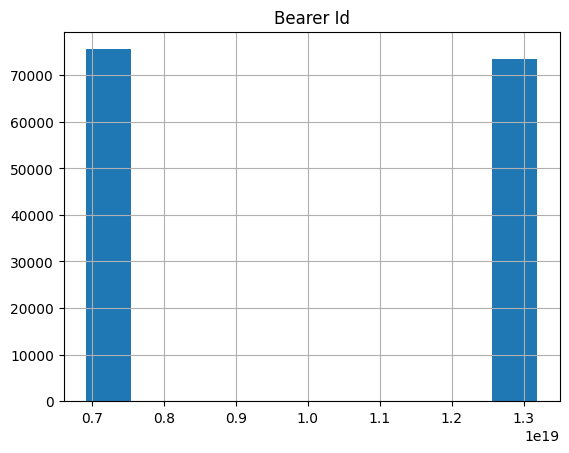

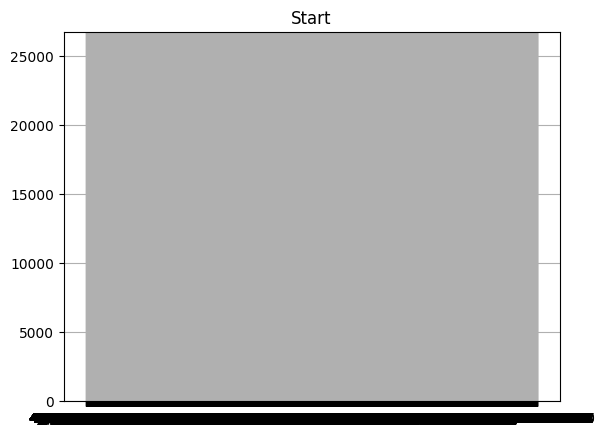

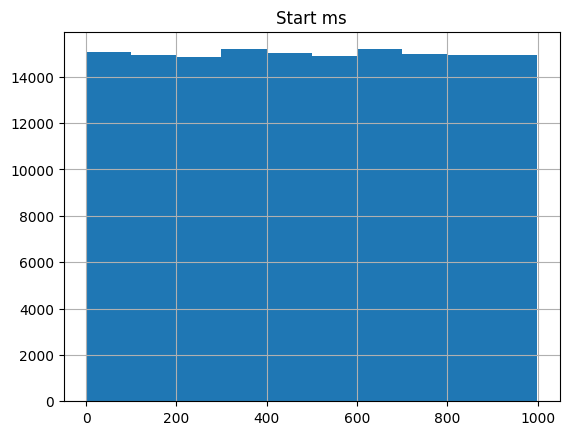

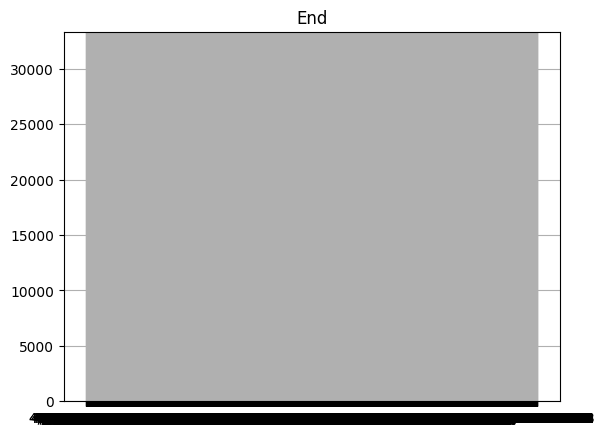

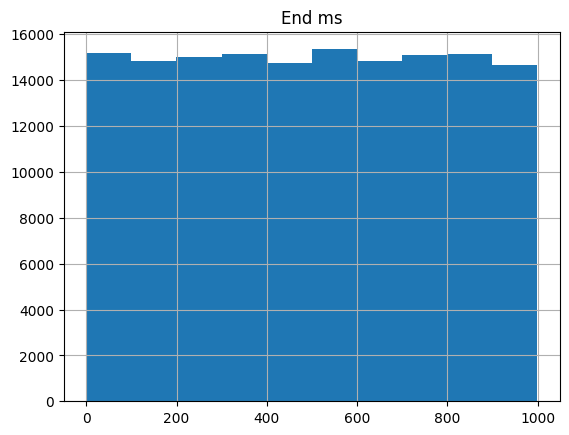

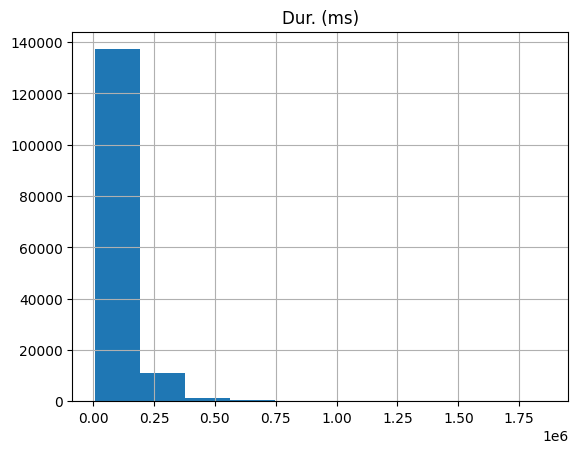

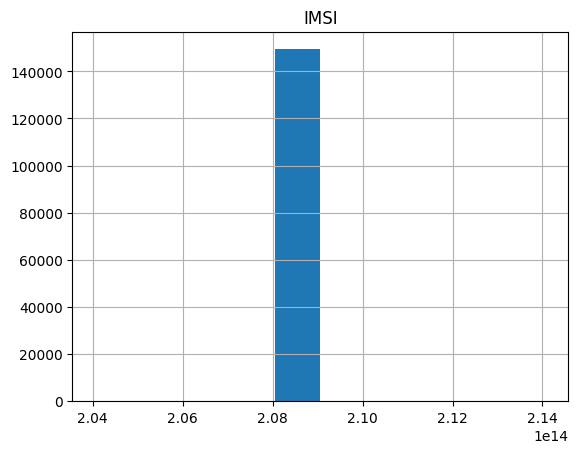

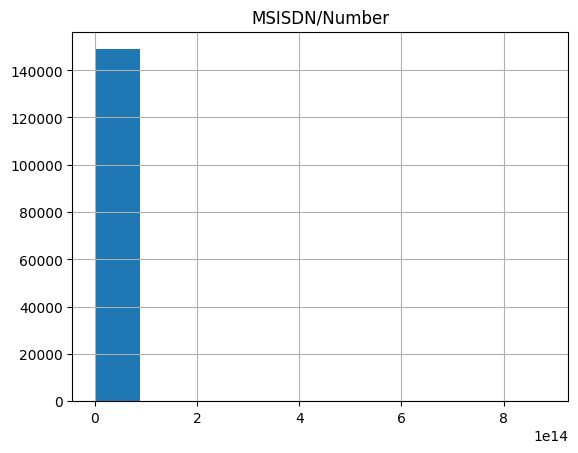

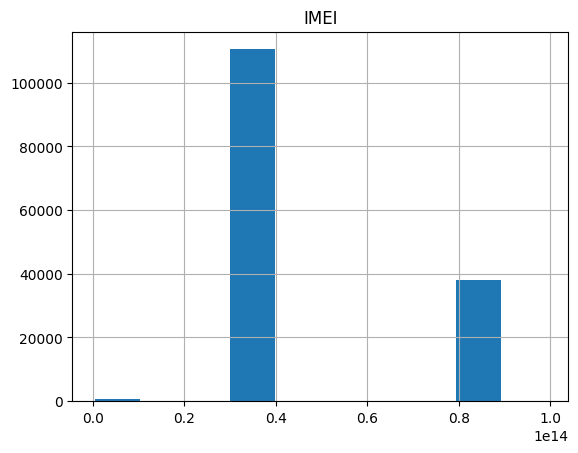

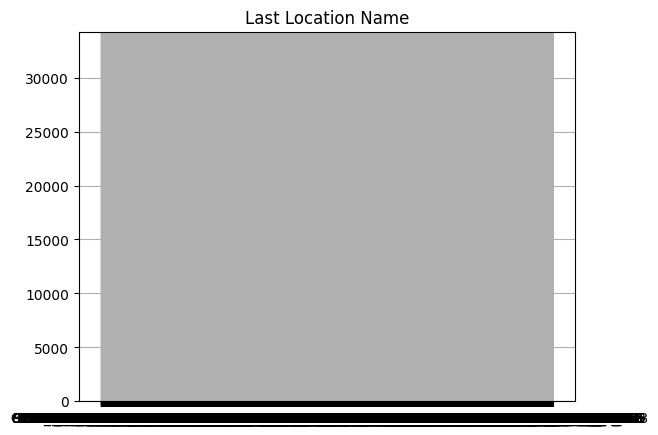

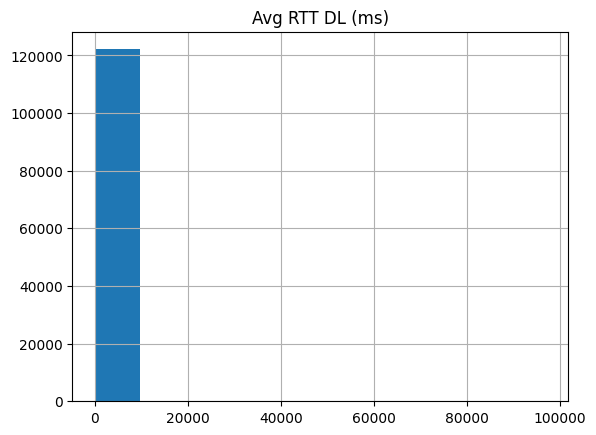

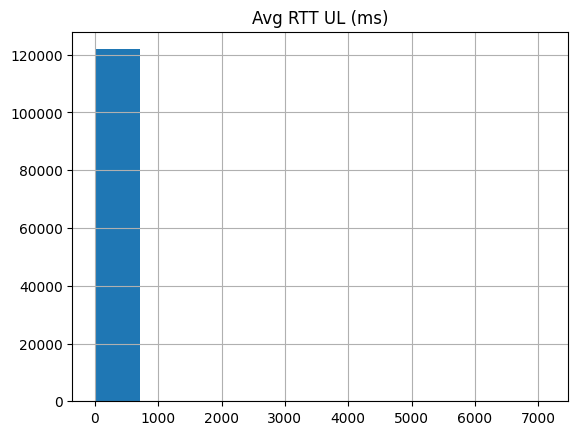

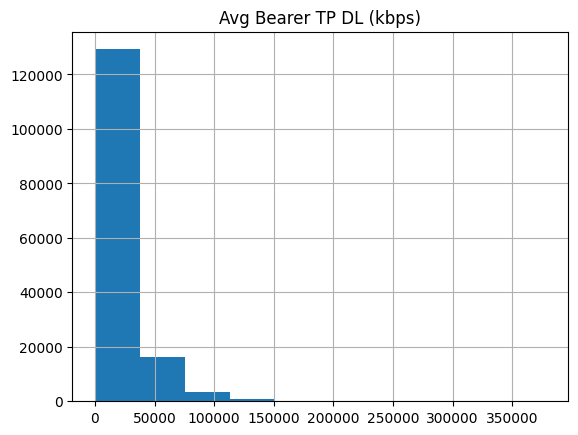

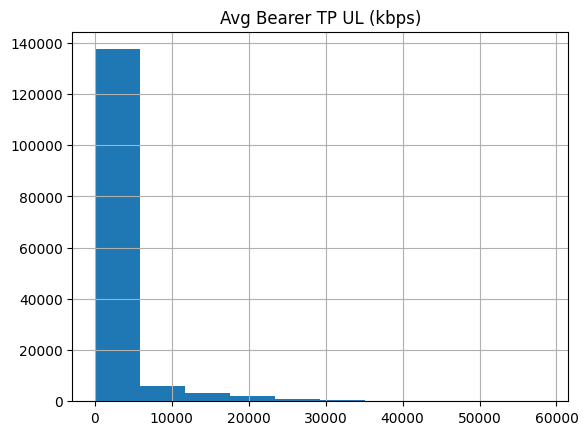

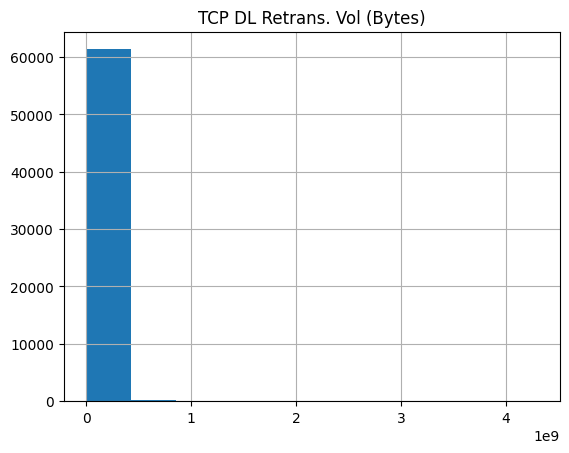

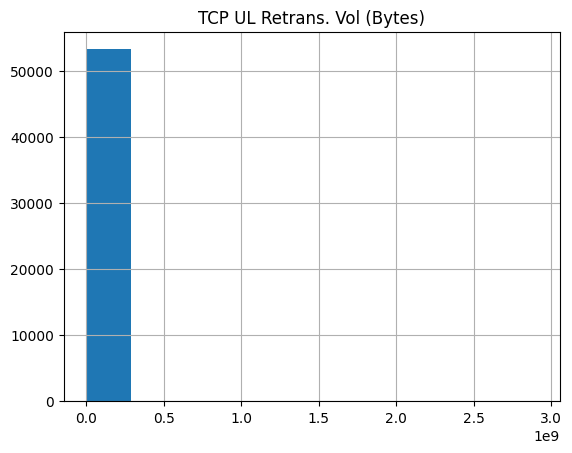

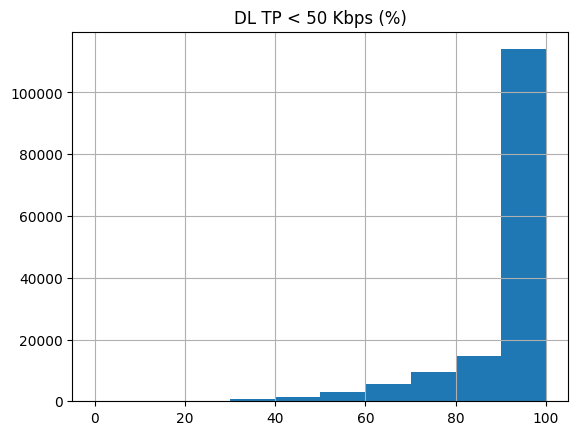

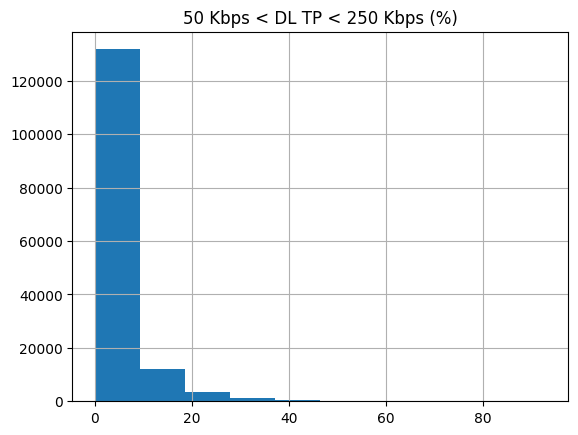

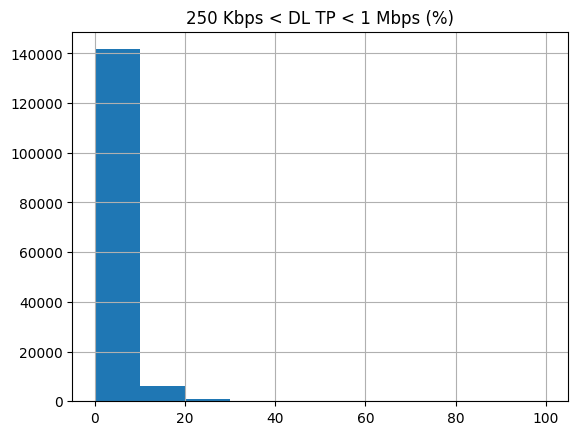

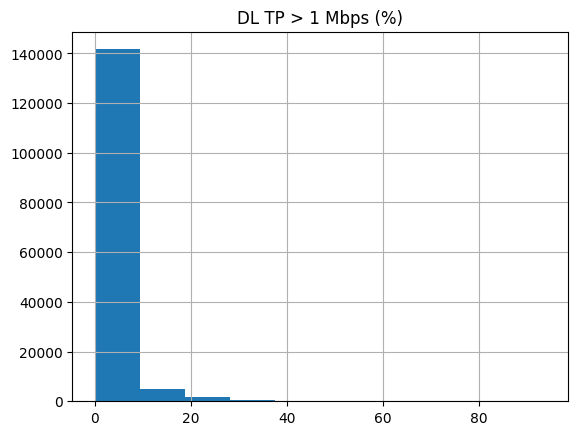

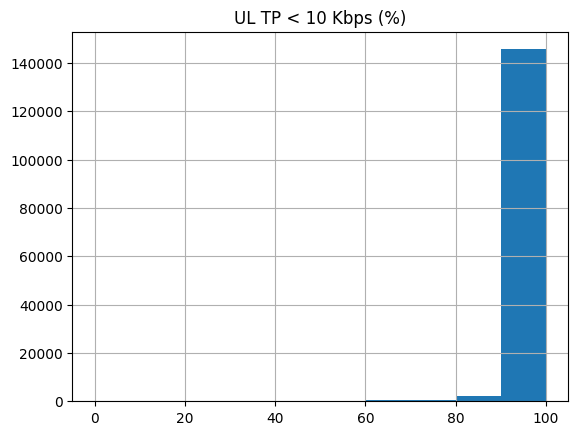

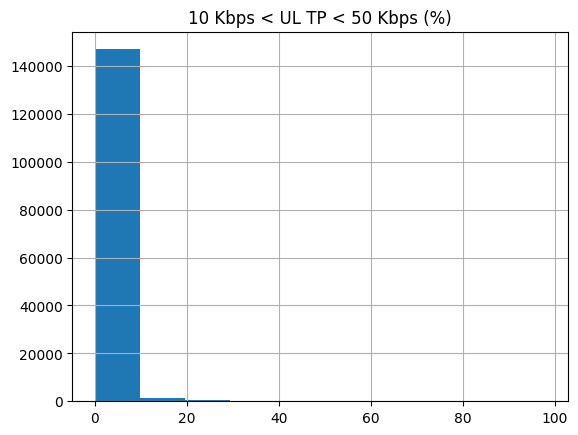

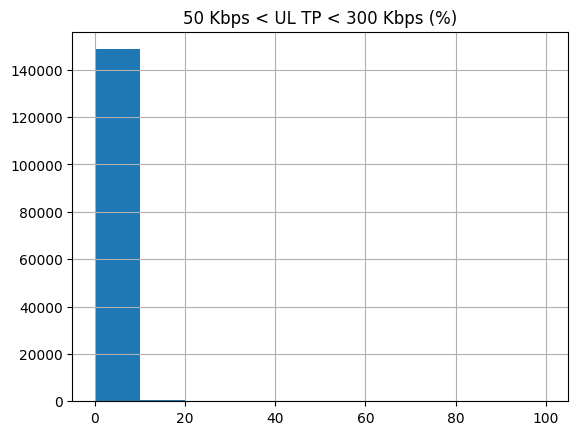

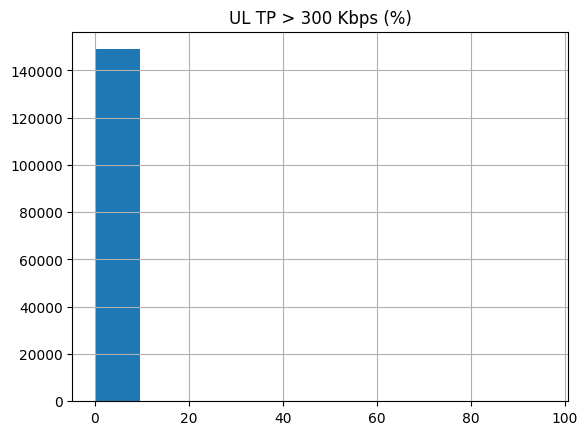

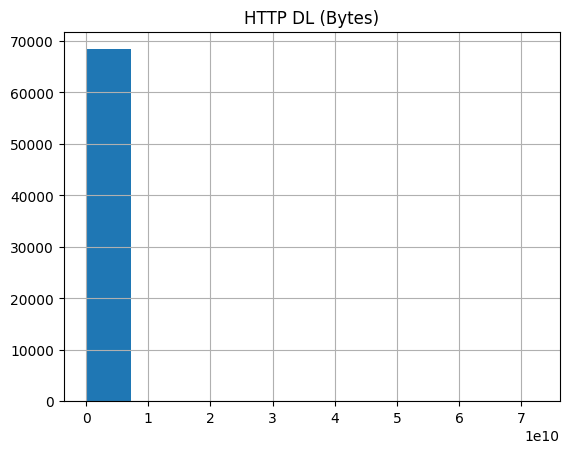

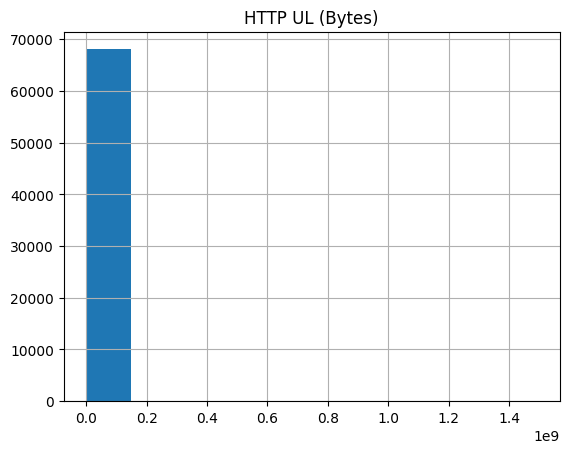

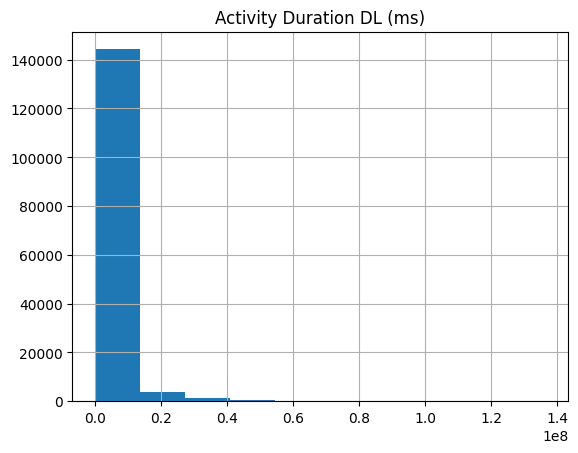

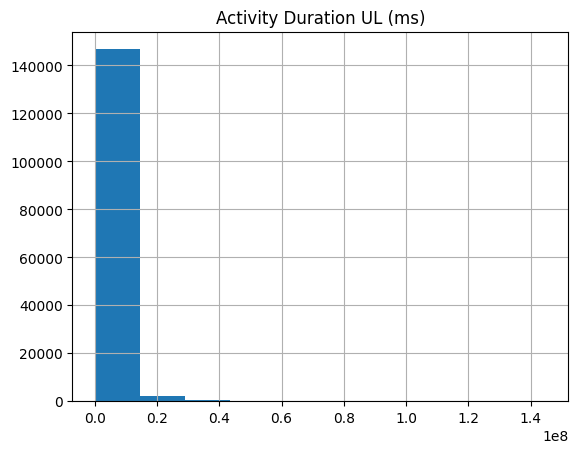

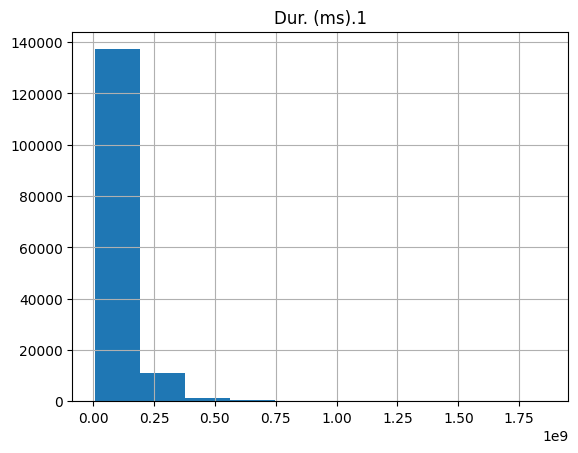

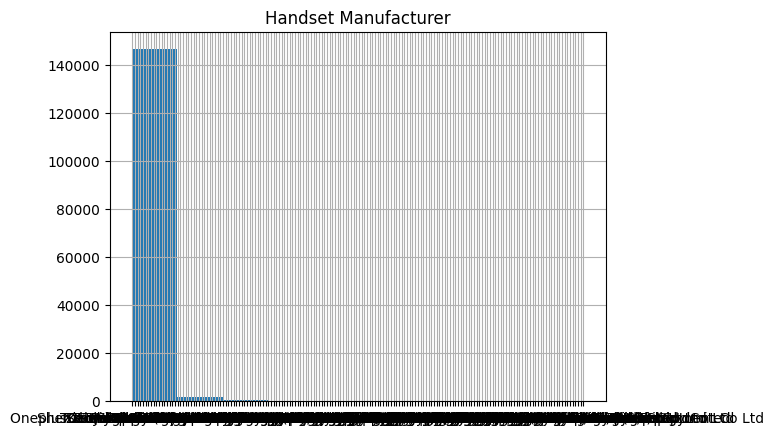

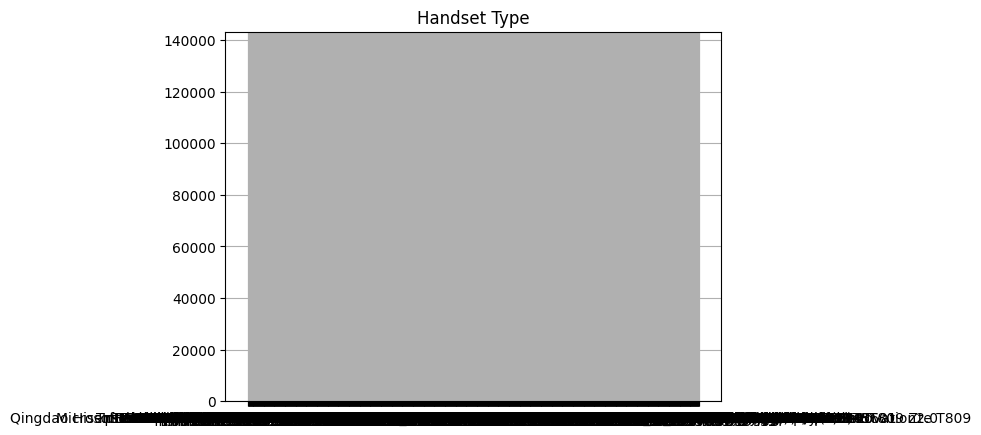

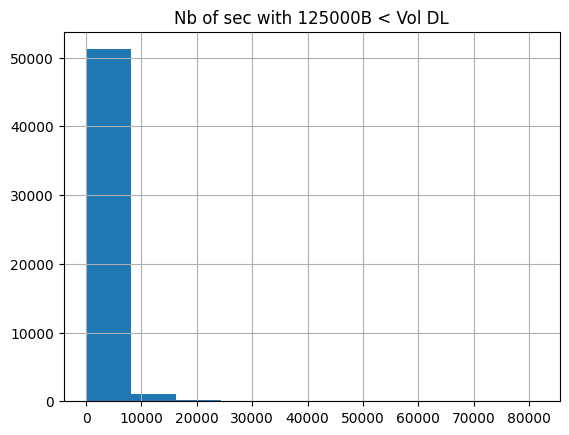

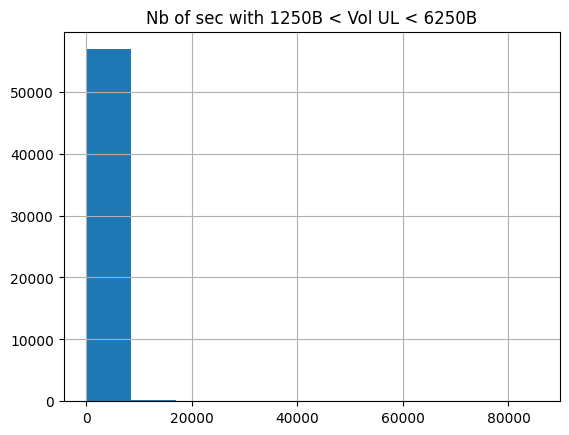

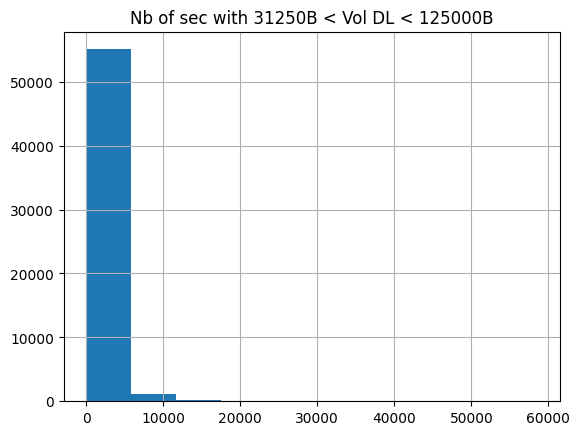

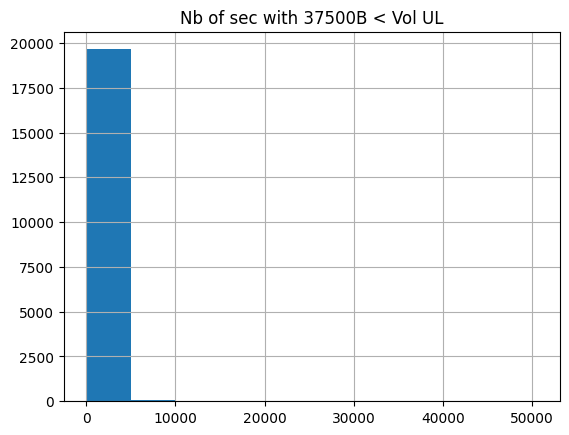

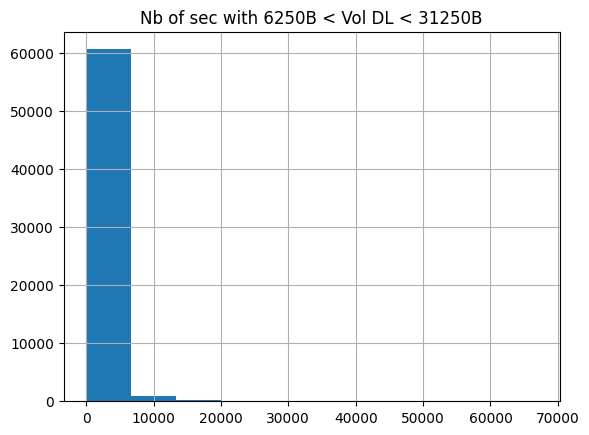

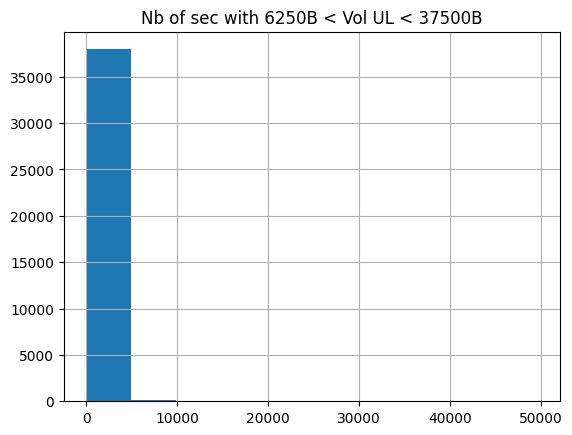

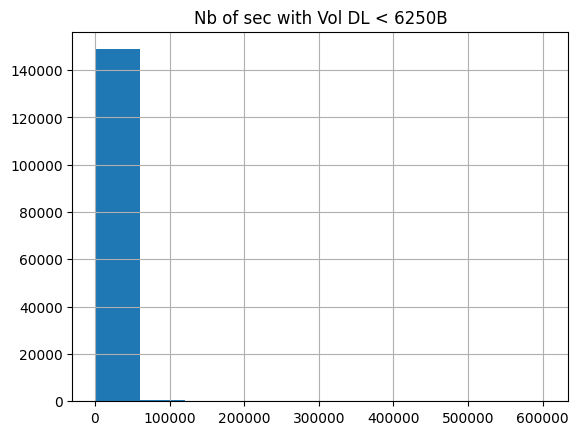

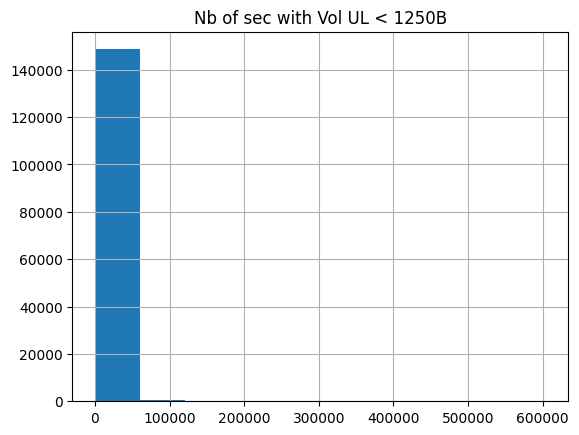

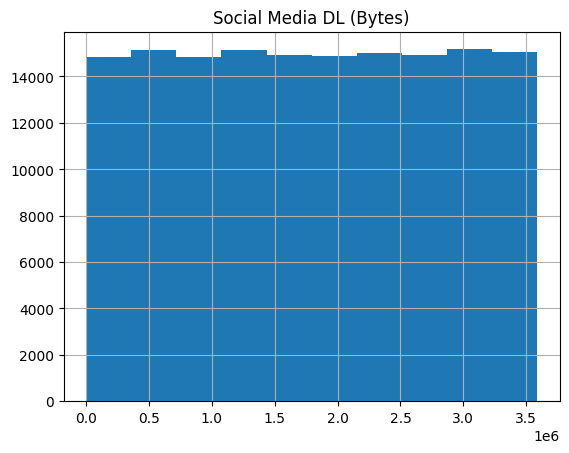

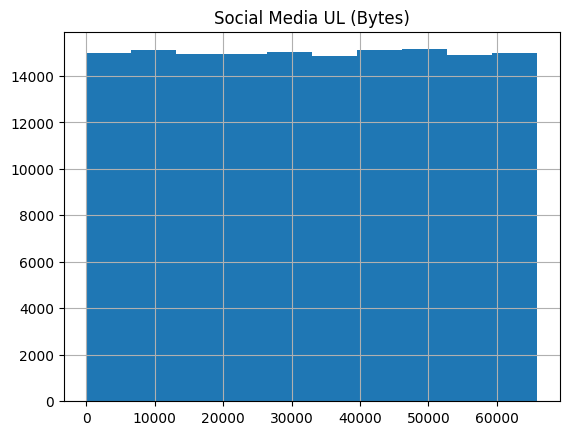

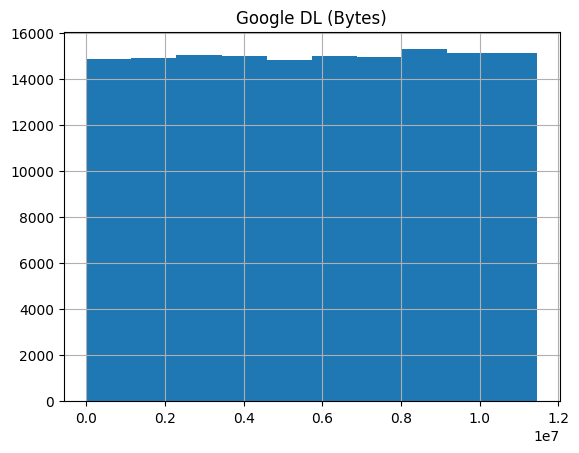

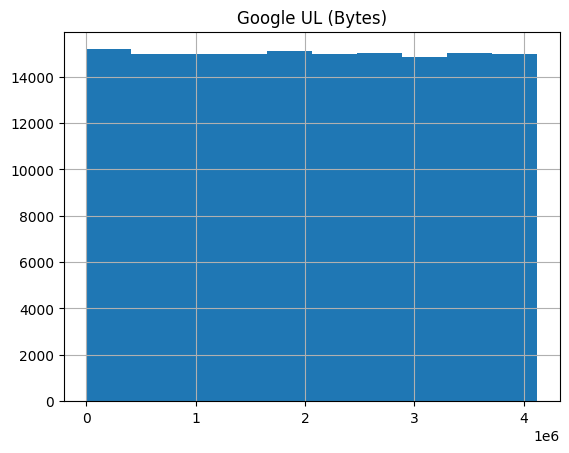

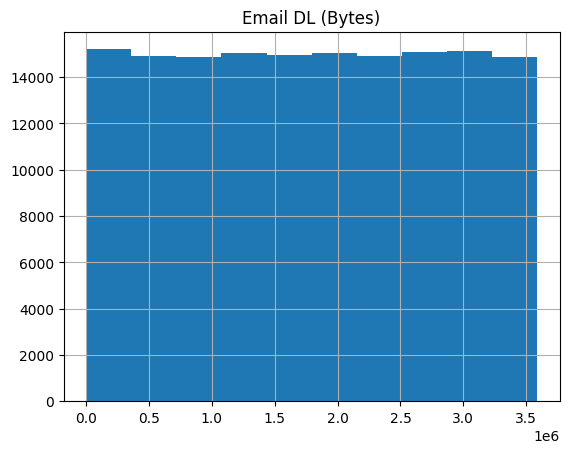

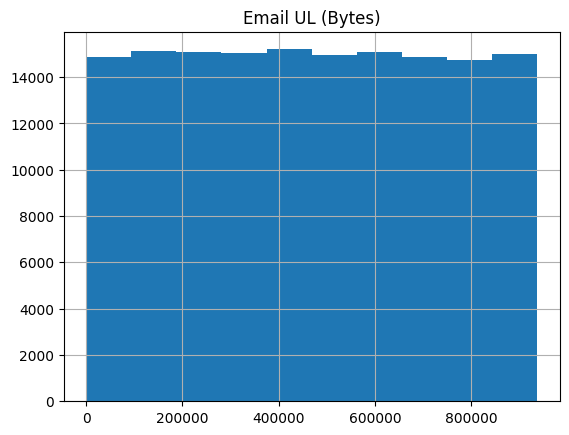

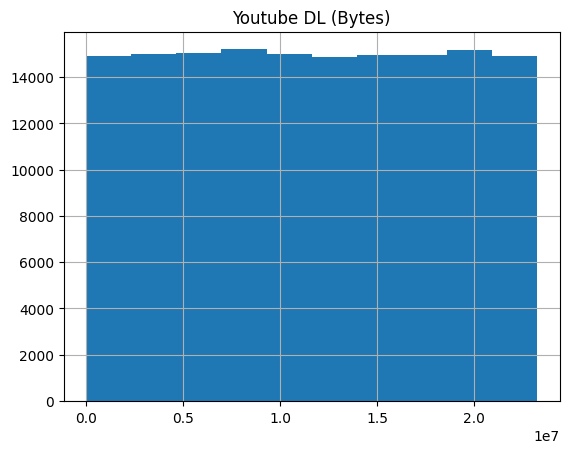

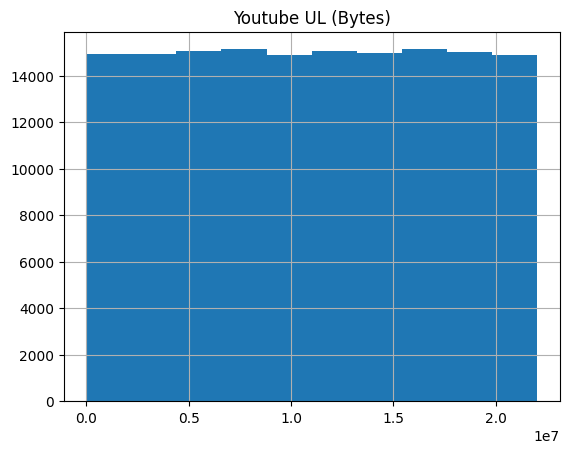

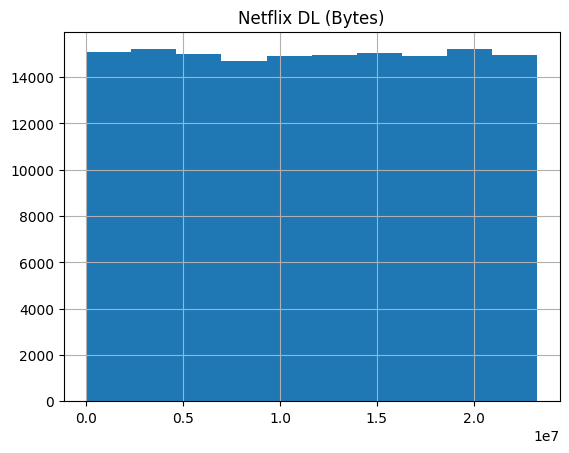

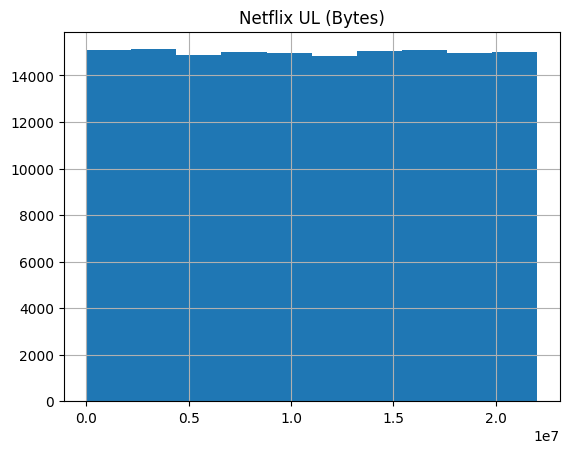

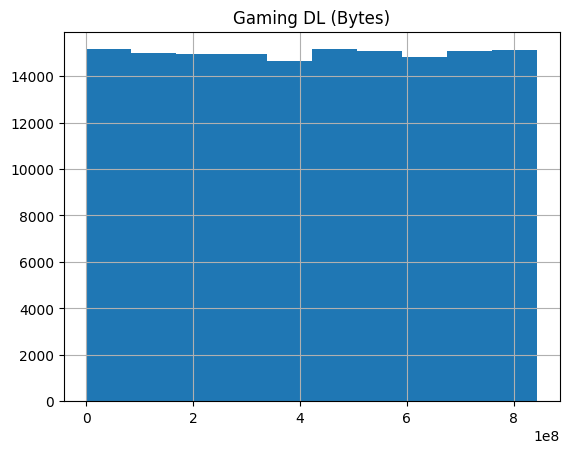

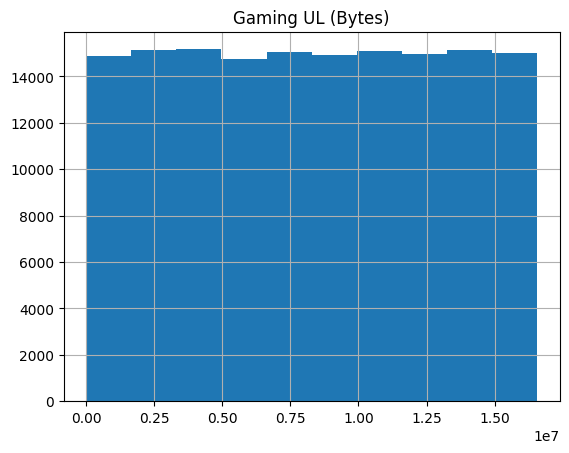

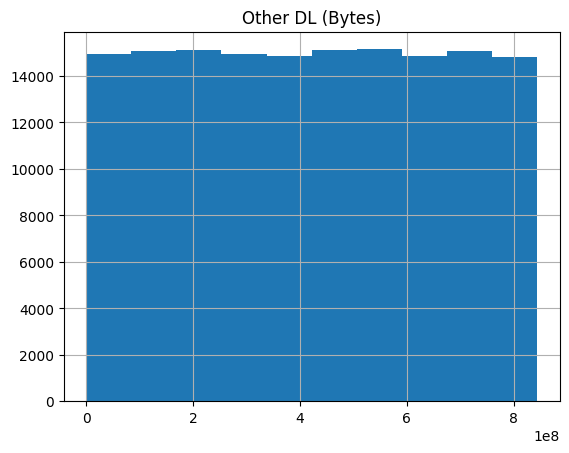

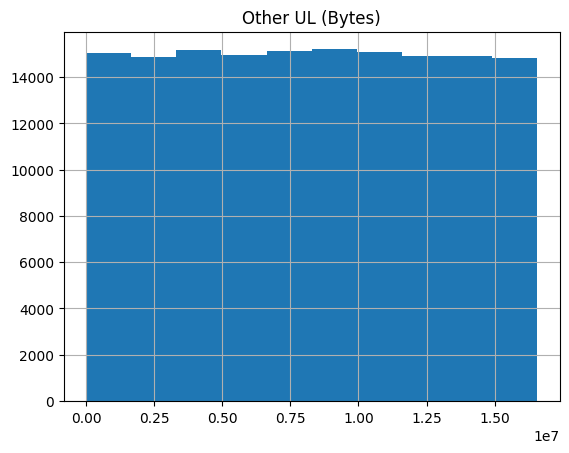

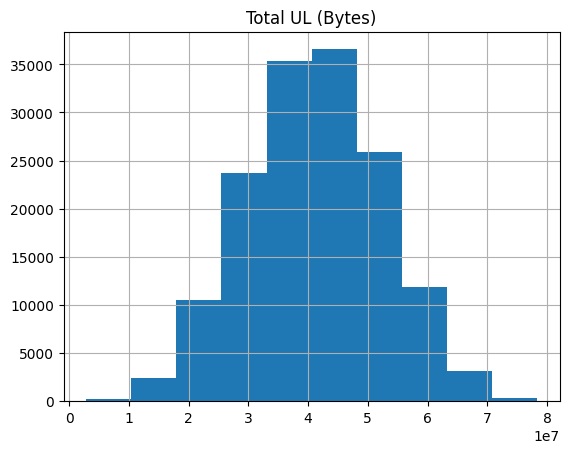

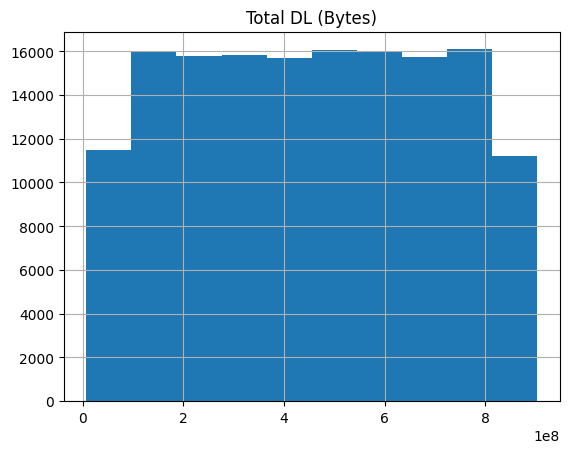

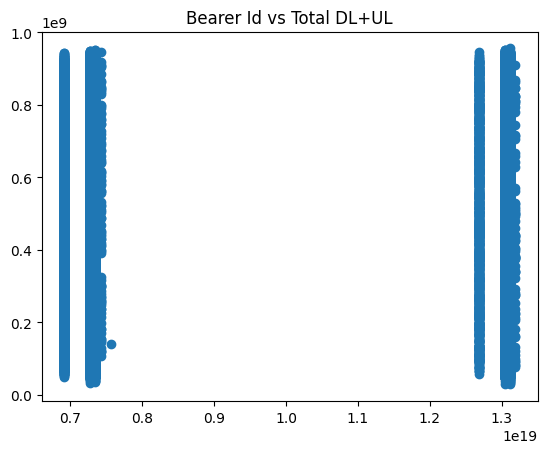

TypeError: 'value' must be an instance of str or bytes, not a None

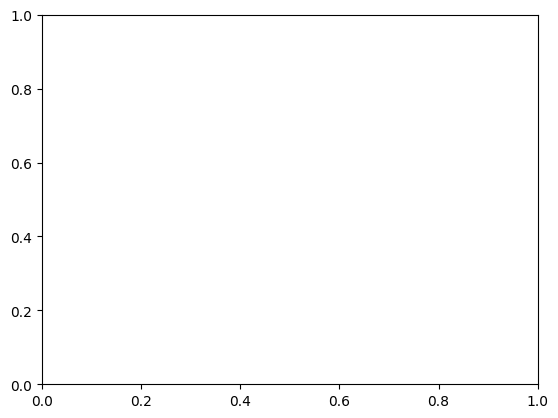

In [49]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

# Describe all relevant variables and associated data types
print(df.info())

# Analyze the basic metrics
print(df.describe())

# Non-Graphical Univariate Analysis
for col in df.select_dtypes(include=['float64', 'int64']).columns:
    print(f'Variance of {col}: {df[col].var()}')
    print(f'Standard Deviation of {col}: {df[col].std()}')

# Graphical Univariate Analysis
for col in df.columns:
    df[col].hist()
    plt.title(col)
    plt.show()

# Bivariate Analysis
for col in df.columns:
    plt.scatter(df[col], df['Total DL (Bytes)'] + df['Total UL (Bytes)'])
    plt.title(f'{col} vs Total DL+UL')
    plt.show()

# Variable transformations
df['decile'] = pd.qcut(df['Dur. (ms).1'], 5, labels=False)
total_data_per_decile = df.groupby('decile')[['Total DL (Bytes)', 'Total UL (Bytes)']].sum()

# Correlation Analysis
cols_to_corr = ['Social Media data', 'Google data', 'Email data', 'Youtube data', 'Netflix data', 'Gaming data', 'Other data']
print(df[cols_to_corr].corr())

# Dimensionality Reduction
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(df[cols_to_corr])
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])
print(principalDf)

In [62]:
# Import necessary libraries
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestRegressor
from sklearn.decomposition import PCA
import pandas as pd
import numpy as np

# Custom Transformer that extracts columns passed as argument to its constructor
class FeatureSelector(BaseEstimator, TransformerMixin):
    def __init__(self, feature_names):
        self._feature_names = feature_names

    def fit(self, X, y=None):
        return self

    def transform(self, X, y=None):
        return X[self._feature_names]

# Custom Transformer that derives new features
class CategoricalEncoder(BaseEstimator, TransformerMixin):
    def __init__(self, new_features):
        self._new_features = new_features

    def fit(self, X, y=None):
        return self

    def transform(self, X, y=None):
        X_new = X.copy()
        for new_feature in self._new_features:
            X_new[new_feature] = (X_new[self._new_features[new_feature]] == self._new_features[new_feature])*1
        return X_new

# Defining the steps in the categorical pipeline
categorical_features = ['Handset Manufacturer', 'Handset Type']
categorical_transformer = Pipeline(steps=[
    ('cat_selector', FeatureSelector(categorical_features)),
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

# Defining the steps in the numerical pipeline
numerical_features = ['Dur. (ms).1', 'Total DL (Bytes)', 'Total UL (Bytes)']
numerical_transformer = Pipeline(steps=[
    ('num_selector', FeatureSelector(numerical_features)),
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())])

# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)])

# The full pipeline as a step in another pipeline with an estimator as the final step
full_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('pca', PCA(n_components=2)),
    ('model', RandomForestRegressor(max_depth=10, random_state=2))
])

# Can call fit on it just like any other pipeline
full_pipeline.fit(train_x, train_y)

# Can predict with it like any other pipeline
full_pipeline.predict(test_x)

NameError: name 'train_x' is not defined

In [63]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

def preprocess_data(df, numeric_features, categorical_features):
    # Define preprocessing for numeric columns (scale values)
    numeric_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='mean')),
        ('scaler', StandardScaler())])

    # Define preprocessing for categorical columns (one hot encoding)
    categorical_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
        ('onehot', OneHotEncoder(handle_unknown='ignore'))])

    # Combine preprocessing steps
    preprocessor = ColumnTransformer(
        transformers=[
            ('num', numeric_transformer, numeric_features),
            ('cat', categorical_transformer, categorical_features)])

    # Fit and transform the data
    df_preprocessed = preprocessor.fit_transform(df)

    return df_preprocessed

# Data Preprocessing

In [68]:
numeric_features = df.select_dtypes(include=['float64', 'int64']).columns.tolist()
categorical_features = df.select_dtypes(include=['object']).columns.tolist()
df_preprocessed = preprocess_data(df, numeric_features, categorical_features)

In [69]:
# Convert the preprocessed data back to a DataFrame
df_preprocessed = pd.DataFrame(df_preprocessed)

In [71]:
df_preprocessed

,0
0,"(0, 0)\t-0.9671941774242543\n (0, 1)\t0.494..."
1,"(0, 0)\t1.031911244278862\n (0, 1)\t0.00627..."
2,"(0, 0)\t1.0319112442794174\n (0, 1)\t0.0270..."
3,"(0, 0)\t1.0319112442796943\n (0, 1)\t0.8482..."
4,"(0, 0)\t1.0319112442806653\n (0, 1)\t-0.451..."
...,...
149996,"(0, 0)\t-0.9671941774449783\n (0, 1)\t-0.20..."
149997,"(0, 0)\t-0.9921830251813044\n (0, 1)\t-1.61..."
149998,"(0, 0)\t-0.9671941774385766\n (0, 1)\t-0.35..."
149999,"(0, 0)\t-0.967194177438136\n (0, 1)\t-0.444..."
